# Project 5 - Value Investor

**Introduction:**

A portfolio investment company, which makes investments in the emerging markets around the world,profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles. Their goal is to establish a robust intelligent system to aid their value investing efforts using stock market data. They make investment decisions based on intrinsic value of companies and do not trade on the basis of daily market volatility. Their profit realization strategy typically involves weekly, monthly and quarterly performance of stocks they buy or hold.


**Data Description:**

You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.


**Goal(s):**

- Predict stock price valuations on a daily, weekly and monthly basis. 
- Recommend BUY, HOLD, SELL decisions. 
- Maximize capital returns and minimize losses. Ideally a loss should never happen.
- Minimize HOLD period.


**Success Metrics:**

- Evaluate on the basis of capital returns. 
- Use Bollinger Bands to measure your systems effectiveness.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

%load_ext autoreload
%autoreload 2

import utils

In [2]:
os.listdir("data")

['2020Q1Q2Q3Q4-2021Q1 - Egypt - Medinet Nasr Housing (MNHD).csv',
 '2020Q1Q2Q3Q4-2021Q1 - South Africa - Impala Platinum Holdings Ltd (IMPJ).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Russia - Sberbank Rossii PAO (SBER).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Brazil - Minerva SA_Brazil (BEEF3).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Colombia - Cementos Argos SA (CCB).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Turkey - Koc Holding AS (KCHOL).csv',
 '2020Q1Q2Q3Q4-2021Q1 - South Korea - Dongkuk Steel Mill Co Ltd (001230).csv',
 '2020Q1Q2Q3Q4-2021Q1 - Argentina - Pampa Energia SA (PAMP).csv']

In [3]:
df = pd.read_csv('data/2020Q1Q2Q3Q4-2021Q1 - Argentina - Pampa Energia SA (PAMP).csv')
print('Before preprocessing')
display(df.head(3))
print('After preprocessing')
df = utils.process_data(df=df)
df.head()

Before preprocessing


,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",85.15,86.5,88.1,85.15,564.30K,-1.10%
1,"Mar 30, 2021",86.1,85.15,86.75,84.6,141.40K,1.29%
2,"Mar 29, 2021",85,80,86,79,371.22K,3.85%


After preprocessing


,Date,Price,High,Low
0,2020-01-02,48.250000,50.200001,47.549999
1,2020-01-03,48.799999,49.450001,46.500000
2,2020-01-06,48.500000,48.700001,47.000000
3,2020-01-07,47.599998,49.000000,46.900002
4,2020-01-08,46.500000,47.500000,46.000000


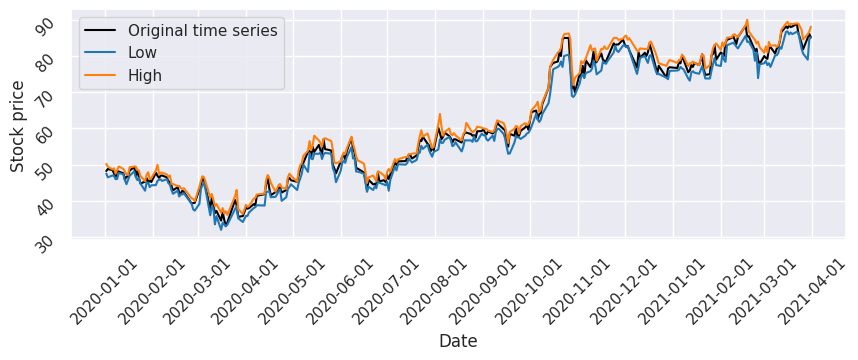

In [4]:
utils.plot_time_series(df, y=['Price', 'Low', 'High'], 
                         labels=['Original time series', 'Low', 'High'],
                         colors=['black', 'tab:blue', 'tab:orange'])

In [5]:
df = utils.check_if_function_stationary(df)

The original price values: 
The time series is NOT stationary and the p-value is 0.8357469591520799

The price values after difference: 
The time series IS stationary and the p-value is 2.2378042019933748e-30


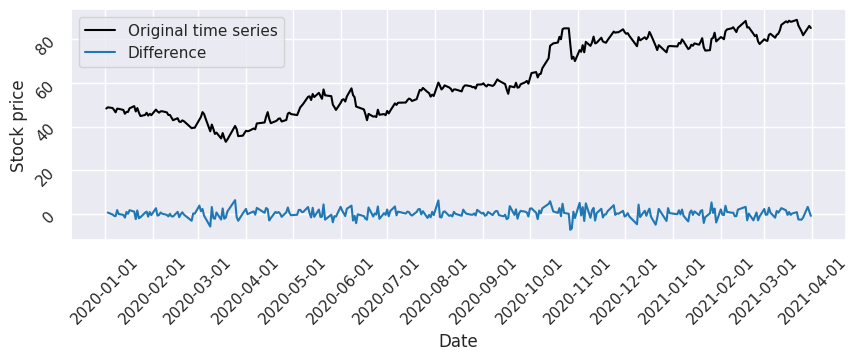

In [6]:
utils.plot_time_series(df, y=['Price', 'Difference'], 
                       labels=['Original time series', 'Difference'],
                       colors=['black', 'tab:blue'])

In [7]:
df = utils.add_additional_features(df)
df.head()

,Date,Price,High,Low,Difference,High_mean_lag_3,High_mean_lag_7,High_mean_lag_30,High_std_lag_3,High_std_lag_7,...,Low_mean_lag_3,Low_mean_lag_7,Low_mean_lag_30,Low_std_lag_3,Low_std_lag_7,Low_std_lag_30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,2020-01-02,48.250000,50.200001,47.549999,0.123411,62.529348,62.281017,60.846066,1.201875,1.82522,...,59.319872,59.083947,57.697338,1.260365,1.855502,3.320369,1,1,2,3
2020-01-03,2020-01-03,48.799999,49.450001,46.500000,0.549999,50.200001,50.200001,50.200001,1.201875,1.82522,...,47.549999,47.549999,47.549999,1.260365,1.855502,3.320369,1,1,3,4
2020-01-06,2020-01-06,48.500000,48.700001,47.000000,-0.299999,49.825001,49.825001,49.825001,0.530330,0.53033,...,47.025000,47.025000,47.025000,0.742462,0.742462,0.742462,1,2,6,0
2020-01-07,2020-01-07,47.599998,49.000000,46.900002,-0.900002,49.450001,49.450001,49.450001,0.750000,0.75000,...,47.016666,47.016666,47.016666,0.525198,0.525198,0.525198,1,2,7,1
2020-01-08,2020-01-08,46.500000,47.500000,46.000000,-1.099998,49.050001,49.337501,49.337501,0.377492,0.65240,...,46.800001,46.987500,46.987500,0.264575,0.432772,0.432772,1,2,8,2


In [8]:
df_train, df_test = utils.get_train_test(df, ['Low', 'High'], '2021-01-01')

In [9]:
lookback = 4
X_train, y_train = utils.create_dataset(df_train, lookback=lookback)
X_test, y_test = utils.create_dataset(df_test, lookback=lookback)
print("(window sample, time steps, features)")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(window sample, time steps, features)
torch.Size([236, 4, 1]) torch.Size([236, 4, 1])
torch.Size([56, 4, 1]) torch.Size([56, 4, 1])


In [10]:
import numpy as np
import torch.optim as optim
import torch.utils.data as data
import torch
import torch.nn as nn
 
model = utils.AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)
 
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 56.8521, test RMSE 81.2029
Epoch 100: train RMSE 6.3258, test RMSE 15.0520
Epoch 200: train RMSE 2.8025, test RMSE 5.7652
Epoch 300: train RMSE 2.0343, test RMSE 2.7063
Epoch 400: train RMSE 1.9988, test RMSE 2.4847
Epoch 500: train RMSE 2.0365, test RMSE 3.1573
Epoch 600: train RMSE 1.9287, test RMSE 2.7197
Epoch 700: train RMSE 1.9369, test RMSE 2.5496
Epoch 800: train RMSE 1.8788, test RMSE 2.7810
Epoch 900: train RMSE 1.9534, test RMSE 2.5552
Epoch 1000: train RMSE 1.9051, test RMSE 3.2097
Epoch 1100: train RMSE 1.9029, test RMSE 2.9277
Epoch 1200: train RMSE 1.8587, test RMSE 3.0693
Epoch 1300: train RMSE 1.8298, test RMSE 3.1841
Epoch 1400: train RMSE 1.8248, test RMSE 2.8962
Epoch 1500: train RMSE 1.8463, test RMSE 3.1264
Epoch 1600: train RMSE 1.8696, test RMSE 2.8392
Epoch 1700: train RMSE 1.8236, test RMSE 3.1817
Epoch 1800: train RMSE 1.7988, test RMSE 3.0652
Epoch 1900: train RMSE 1.8102, test RMSE 2.9851


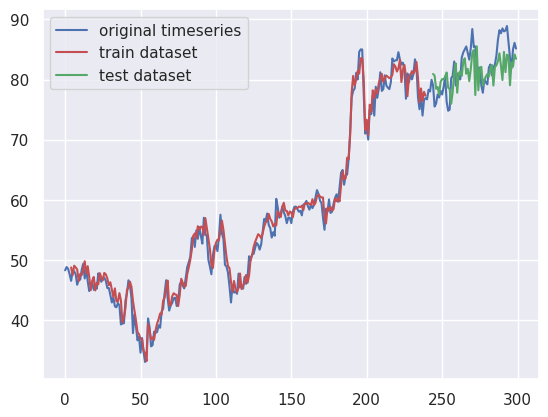

In [11]:
train_plot, test_plot = utils.get_test(model, df, X_train, X_test, lookback)
timeseries = np.reshape(np.array(df['Price']), np.array(df['Price']).shape + (1,))
plt.plot(timeseries, c='b', label='original timeseries')
plt.plot(train_plot, c='r', label='train dataset')
plt.plot(test_plot, c='g', label='test dataset')
plt.legend()
plt.show()